# Mini Project 1 - Airbnb

**Problem Statement:**  
> a) Should our investor invest in an AirBnB hotel in Amsterdam?  
> b) And, if so, which neighborhood should they invest in? 

## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as mtick
import seaborn as sns

from scipy import stats

from pandas import ExcelFile
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize': (20, 6)})

#to make the interactive maps
import folium
import geopandas as gpd
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


## Dataset  

In [2]:
airbnb = pd.read_excel(r'Airbnb-Data.xlsx')
airbnb.head()

/opt/anaconda3/envs/iod_env/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


# Exploratory Data Analysis

### Data Wrangling and Munging
Getting to know and prepare the dataset

**Shape of Dataframe**

In [3]:
airbnb.shape

(7833, 33)

**Datatypes of each column**

In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7833 entries, 0 to 7832
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_id                      7833 non-null   int64  
 1   host_name                    7833 non-null   object 
 2   host_since_year              7833 non-null   int64  
 3   host_since_anniversary       7833 non-null   object 
 4   id                           7833 non-null   int64  
 5   neighbourhood_cleansed       7833 non-null   object 
 6   city                         7833 non-null   object 
 7   state                        7825 non-null   object 
 8   zipcode                      7660 non-null   object 
 9   country                      7833 non-null   object 
 10  latitude                     7833 non-null   float64
 11  longitude                    7833 non-null   float64
 12  property_type                7833 non-null   object 
 13  room_type         

**Check whether dataset have any null values.**

In [5]:
pd.DataFrame(airbnb.isnull().sum()[airbnb.isnull().sum() > 0], columns=["Null Values"])

,Null Values
state,8
zipcode,173
bathrooms,69
bedrooms,14
beds,13
host_response_time,732
host_response_rate,732
review_scores_rating,1698
review_scores_accuracy,1709
review_scores_cleanliness,1709


In [6]:
# Observing the number of null values in the dataset as a percentage
round((airbnb.isnull().sum()/len(airbnb)) * 100, 2)

host_id                         0.00
host_name                       0.00
host_since_year                 0.00
host_since_anniversary          0.00
id                              0.00
neighbourhood_cleansed          0.00
city                            0.00
state                           0.10
zipcode                         2.21
country                         0.00
latitude                        0.00
longitude                       0.00
property_type                   0.00
room_type                       0.00
accommodates                    0.00
bathrooms                       0.88
bedrooms                        0.18
beds                            0.17
bed_type                        0.00
price                           0.00
guests_included                 0.00
extra_people                    0.00
minimum_nights                  0.00
host_response_time              9.35
host_response_rate              9.35
number_of_reviews               0.00
review_scores_rating           21.68
r

## Fill Null Values

Is there any null values in any columns? 
- Identify those columns
    > Yes, there are **14 columns**: 
        - state
        - zipcode
        - bathrooms
        - bedrooms
        - beds
        - host_response_time
        - host_response_rate
        - review_scores_rating
        - review_scores_accuracy
        - review_scores_cleanliness
        - review_scores_checkin
        - review_scores_communication
        - review_scores_location
        - review_scores_value
        
- Fill those null values using your own logic
- State your logic behind every steps

**zipcode**

In [7]:
# airbnb.isnull().sum()
zipList = list(airbnb["zipcode"].unique())
print(f"Distinct Zipcodes: {zipList}")

Distinct Zipcodes: [1053, nan, 1017, '1016 AM', '1071 VV', 1078, 1015, 1072, '1056 TM', '1011 JX', 1013, '1055XP', '1013HE', 1059, '1097 AM', 1018, '1053 LB', 1016, 1058, 1052, '1015 GN', 1054, '1013 NS', 1019, '1019 WZ', '1018 HL', '1012 ML', '1016 LK', '1053 MX', '1074 EN', '1073 GG', '1091 DM', '1053 NP', '1017 RD', '1052 SJ', '1072 CC', 1092, 1012, '1052 EJ', '1079 LM', '1074 JH', '1051AL', '1016 HG', '1015 DT', '1016 BL', 1095, 1011, 1056, '1056 GC', '1072 AW', '1091TL', '1056 DC', '1016 SP', '1013 WJ', '1053 KR', 1055, 1079, '1055 ZT', 1086, '1073CH', 1098, '1078 GK', '1012 VS', '1017 HH', '1015 JJ', '1012 KE', 1091, '1017HH', '1083 GP', '1051 HM', 1074, '1015 XS', '1062 GR', '1095 ER', '1013 BX', '1015 SV', '1023 AT', '1074 XA', 1057, 1071, '1053 LZ', '1012 GB', '1012da', 1073, '1024 BE', '1013 EE', '1054 ZW', 1093, '1055SC', '1098 TJ', '1072 VP', '1015 LP', '1051 GL', '1086 ZM', '1013 NN', '1019 HK', '1015 JG', 1087, 1068, '1017 ZJ', '1056xb', '1071 DN', '1013 KH', '1053 DC', 1

Given that there are a lot of unique zipcodes and the main question to answer is identifying which neighbourhood to invest in Amsterdam, hence, I have decided that we can disregard/neglect the nan values in the zipcode column. 

**Bathrooms**

In [8]:
bathroomsList = list(airbnb["bathrooms"].unique())
print(f"Distinct Bathrooms: {bathroomsList}")

Distinct Bathrooms: [2.0, 1.0, 1.5, nan, 4.0, 3.0, 0.0, 2.5, 0.5, 3.5, 8.0, 7.5, 5.0]


Rounding up the number of bathrooms to the nearest full integer as there is no such thing as a 0.5 bathroom.

In [9]:
airbnb["bathrooms"] = round(airbnb["bathrooms"])

Avg number of Bathrooms: 1.0
The null values will be replaced with the value of the Avg number of Bathrooms.


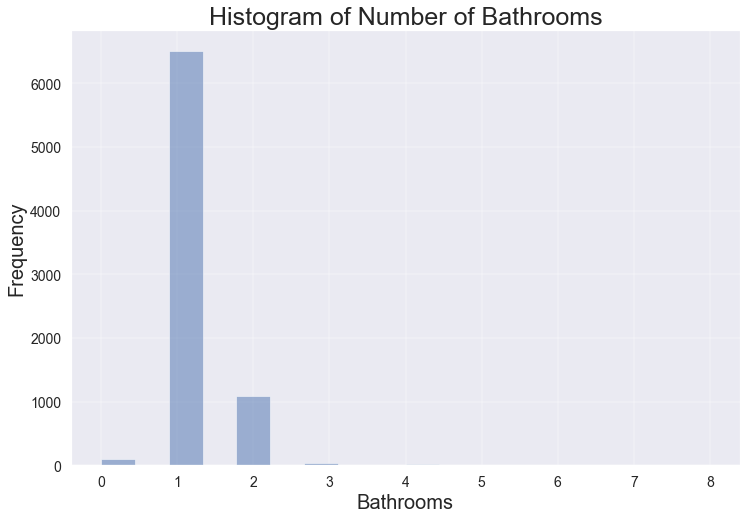

In [10]:
meanBathrooms = round(np.mean(airbnb["bathrooms"]),0)

print(f"Avg number of Bathrooms: {meanBathrooms}")
print(f"The null values will be replaced with the value of the Avg number of Bathrooms.")

plt.figure(figsize=(12, 8))
plt.hist(airbnb["bathrooms"], color='b', alpha=0.5, bins=18)
plt.xlabel("Bathrooms", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Histogram of Number of Bathrooms", fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(linewidth=2, alpha=0.2)
plt.style.use('seaborn-darkgrid')

plt.show()

In [11]:
airbnb['bathrooms'].fillna(meanBathrooms, inplace=True)
# airbnb.isnull().sum()

**Bedrooms**

In [12]:
bedroomsList = list(airbnb["bedrooms"].unique())
print(f"Distinct Bedrooms: {bedroomsList}")

Distinct Bedrooms: [2.0, 1.0, 0.0, 4.0, 5.0, 3.0, nan, 10.0, 7.0, 9.0, 6.0, 8.0]


Avg number of Bedrooms: 1.0
The null values will be replaced with the value of the Avg number of Bedrooms.


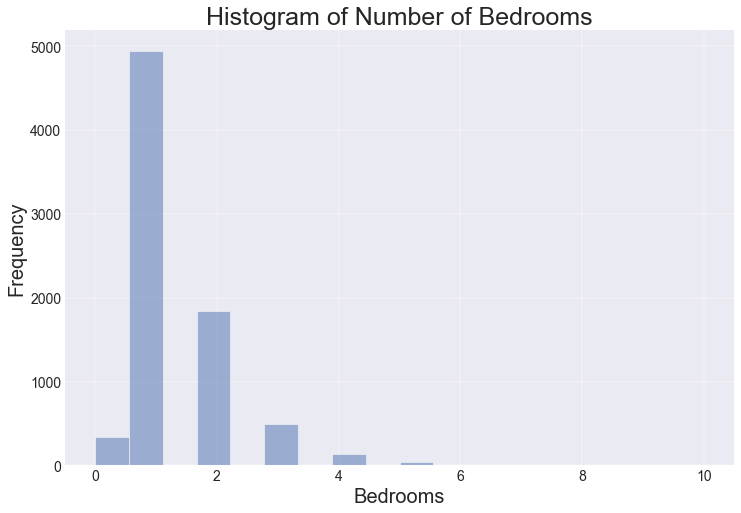

In [13]:
meanBedrooms = round(np.mean(airbnb["bedrooms"]),0)

print(f"Avg number of Bedrooms: {meanBedrooms}")
print(f"The null values will be replaced with the value of the Avg number of Bedrooms.")

plt.figure(figsize=(12, 8))
plt.hist(airbnb["bedrooms"], color='b', alpha=0.5, bins=18)
plt.xlabel("Bedrooms", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Histogram of Number of Bedrooms", fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(linewidth=2, alpha=0.2)
plt.style.use('seaborn-darkgrid')

plt.show()

In [14]:
airbnb['bedrooms'].fillna(meanBedrooms, inplace=True)
# airbnb.isnull().sum()

**Beds**

In [15]:
bedsList = list(airbnb["beds"].unique())
print(f"Distinct Beds: {bedsList}")

Distinct Beds: [2.0, 1.0, 4.0, 5.0, 6.0, 3.0, 8.0, nan, 16.0, 14.0, 10.0, 7.0, 9.0, 12.0, 15.0]


Avg number of Beds: 2.0
The null values will be replaced with the value of the Avg number of Beds.


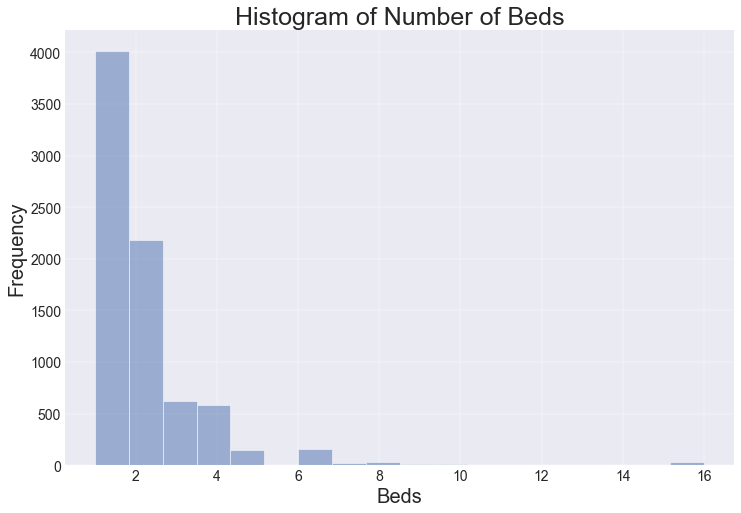

In [16]:
meanBeds = round(np.mean(airbnb["beds"]),0)

print(f"Avg number of Beds: {meanBeds}")
print(f"The null values will be replaced with the value of the Avg number of Beds.")

plt.figure(figsize=(12, 8))
plt.hist(airbnb["beds"], color='b', alpha=0.5, bins=18)
plt.xlabel("Beds", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Histogram of Number of Beds", fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(linewidth=2, alpha=0.2)
plt.style.use('seaborn-darkgrid')

plt.show()

In [17]:
airbnb['beds'].fillna(meanBeds, inplace=True)
# airbnb.isnull().sum()

**Host Response Rate**

Avg Host Response Rate: 0.91
The null values will be replaced with the value of the Avg Host Response Rate.


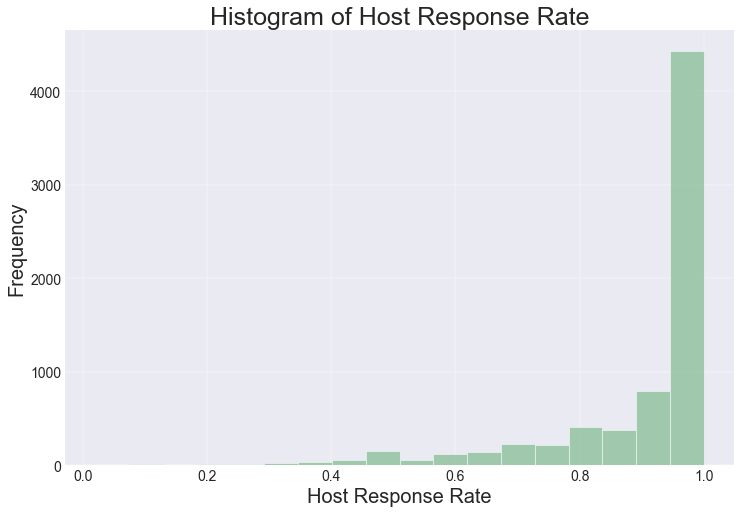

In [18]:
meanHostRR = round(np.mean(airbnb["host_response_rate"]), 2)

print(f"Avg Host Response Rate: {meanHostRR}")
print(f"The null values will be replaced with the value of the Avg Host Response Rate.")

plt.figure(figsize=(12, 8))
plt.hist(airbnb["host_response_rate"], color='g', alpha=0.5, bins=18)
plt.xlabel("Host Response Rate", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.title("Histogram of Host Response Rate", fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(linewidth=2, alpha=0.2)
plt.style.use('seaborn-darkgrid')

plt.show()

In [19]:
airbnb['host_response_rate'].fillna(meanHostRR, inplace=True)
# airbnb.isnull().sum()

**Review Scores Columns**

Avg Review Scores Rating: 93.34
The null values will be replaced with the value of the Avg Review Scores Rating.


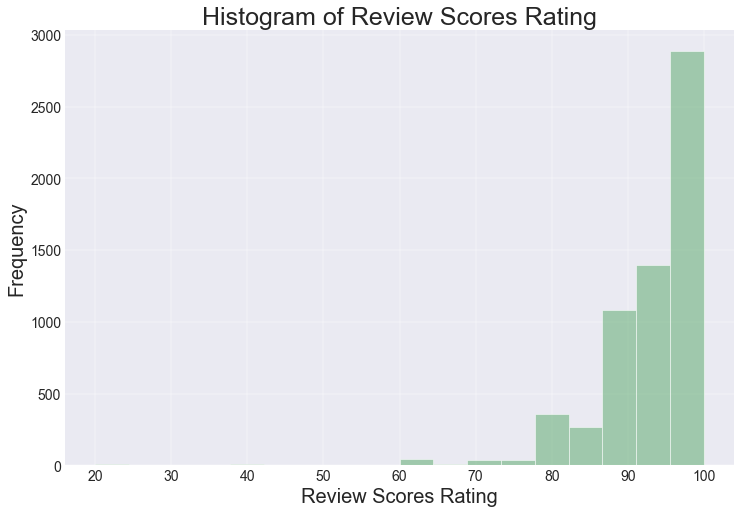

Avg Review Scores Accuracy: 9.45
The null values will be replaced with the value of the Avg Review Scores Accuracy.


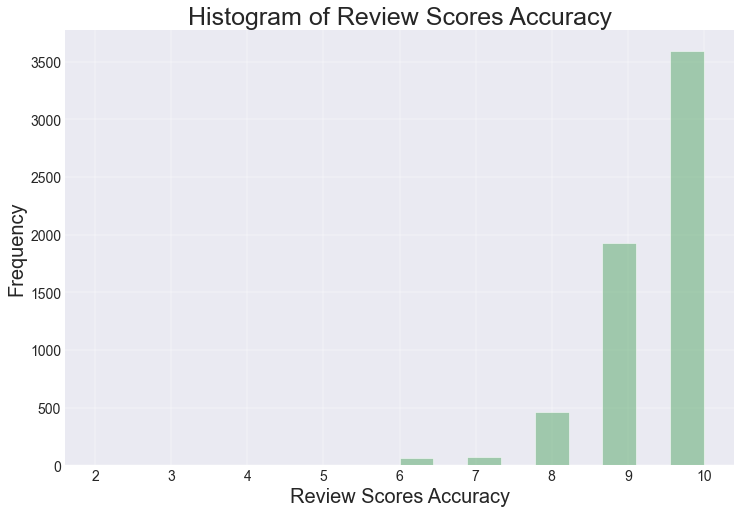

Avg Review Scores Cleanliness: 9.29
The null values will be replaced with the value of the Avg Review Scores Cleanliness.


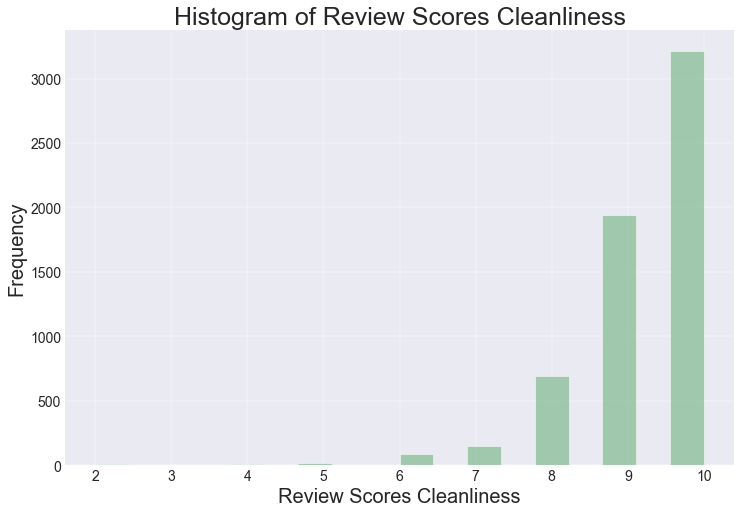

Avg Review Scores Checkin: 9.64
The null values will be replaced with the value of the Avg Review Scores Checkin.


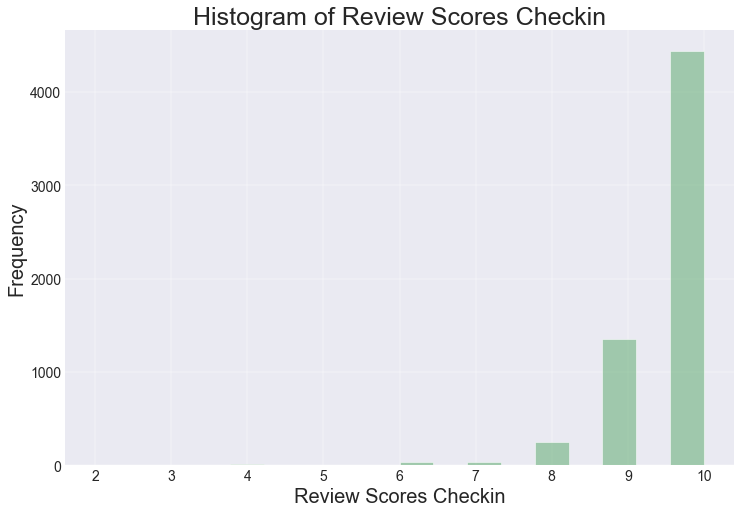

Avg Review Scores Communication: 9.7
The null values will be replaced with the value of the Avg Review Scores Communication.


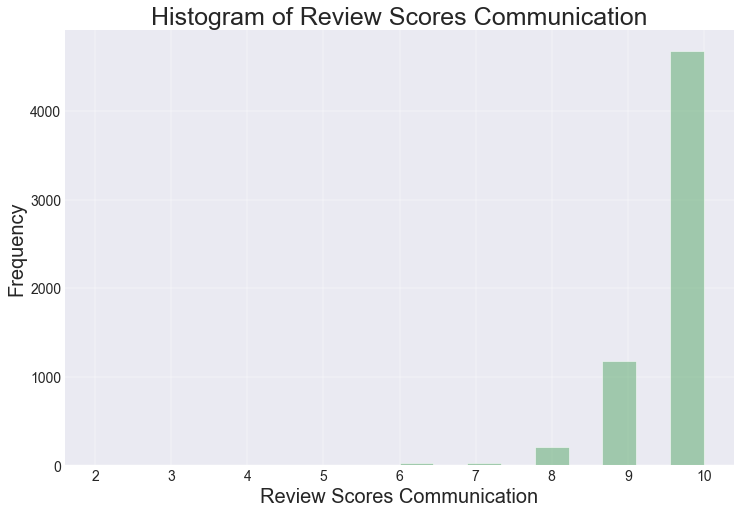

Avg Review Scores Location: 9.29
The null values will be replaced with the value of the Avg Review Scores Location.


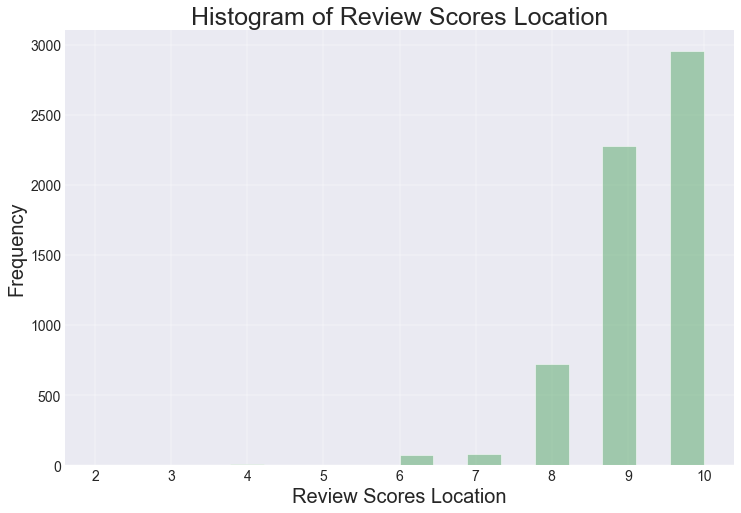

Avg Review Scores Value: 9.04
The null values will be replaced with the value of the Avg Review Scores Value.


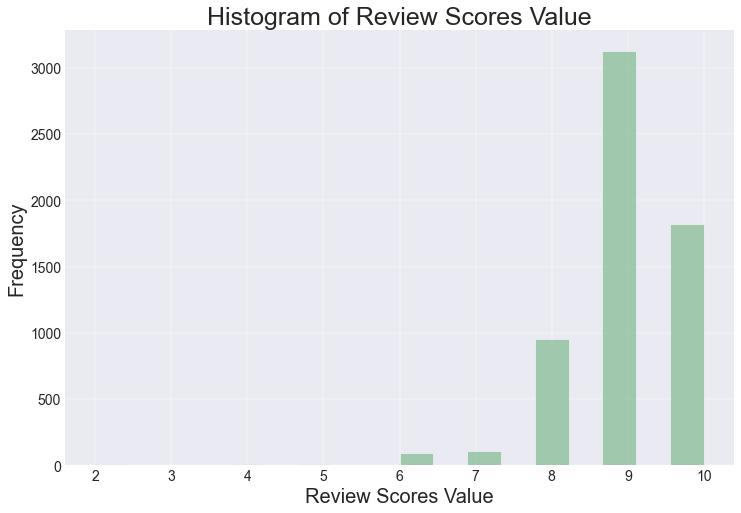

In [20]:
RSList = ["review_scores_rating", 
          "review_scores_accuracy", 
          "review_scores_cleanliness", 
          "review_scores_checkin", 
          "review_scores_communication", 
          "review_scores_location", 
          "review_scores_value"]

xlabels = ["Review Scores Rating", 
          "Review Scores Accuracy", 
           "Review Scores Cleanliness", 
          "Review Scores Checkin", 
          "Review Scores Communication", 
          "Review Scores Location", 
          "Review Scores Value"]

for i in range(len(RSList)):
    mean = round(np.mean(airbnb[RSList[i]]),2)
    print(f"Avg {xlabels[i]}: {mean}")
    print(f"The null values will be replaced with the value of the Avg {xlabels[i]}.")
    
    plt.figure(figsize=(12, 8))
    plt.hist(airbnb[RSList[i]], color='g', alpha=0.5, bins=18)
    plt.xlabel(xlabels[i], fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.title(f"Histogram of {xlabels[i]}", fontsize=25)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(linewidth=2, alpha=0.2)
    plt.style.use('seaborn-darkgrid')

    plt.show()
    
    

In [21]:
for i in range(len(RSList)):
    mean = round(np.mean(airbnb[RSList[i]]),2)
    airbnb[RSList[i]].fillna(mean, inplace=True)
    
# airbnb.isnull().sum()

Avg Review Scores Rating: 93.34
The null values will be replaced with the value of the Avg Review Scores Rating.


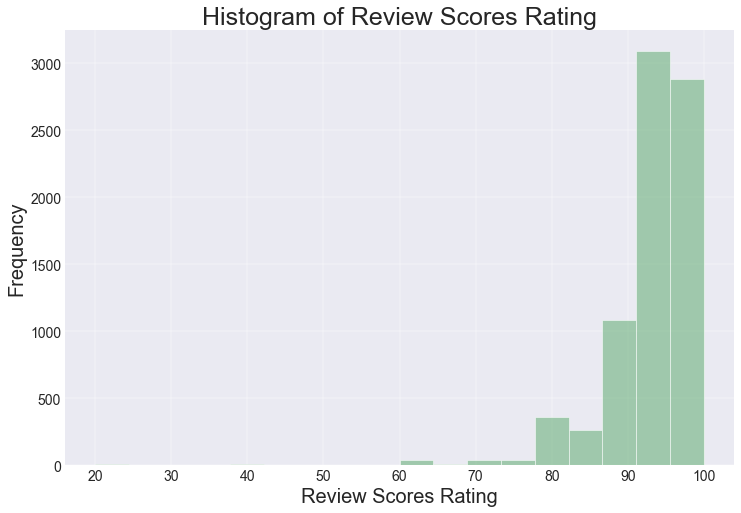

Avg Review Scores Accuracy: 9.45
The null values will be replaced with the value of the Avg Review Scores Accuracy.


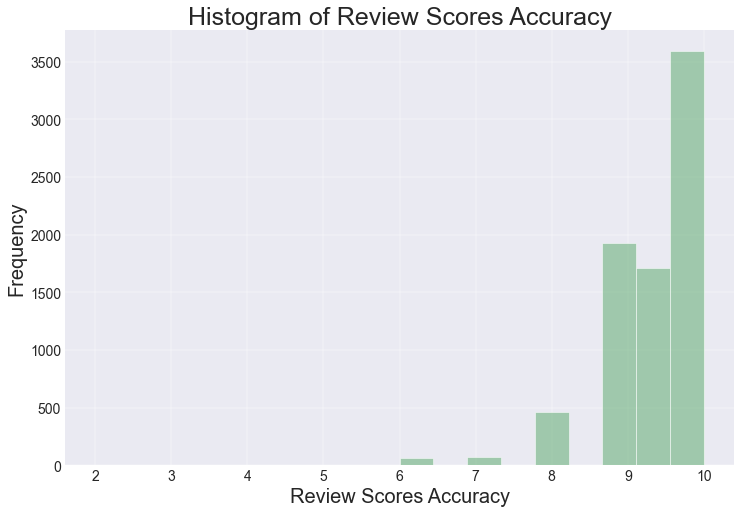

Avg Review Scores Cleanliness: 9.29
The null values will be replaced with the value of the Avg Review Scores Cleanliness.


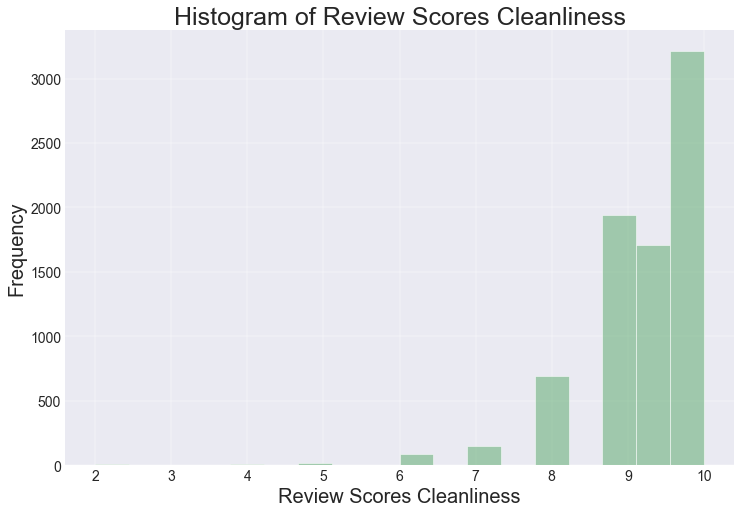

Avg Review Scores Checkin: 9.64
The null values will be replaced with the value of the Avg Review Scores Checkin.


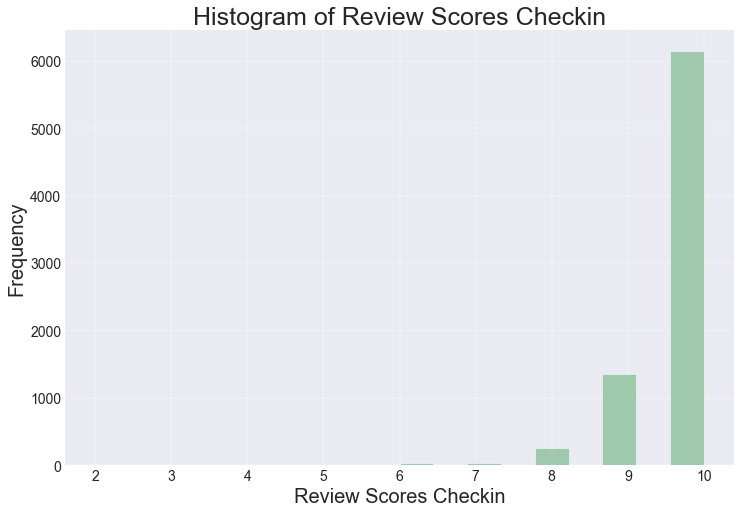

Avg Review Scores Communication: 9.7
The null values will be replaced with the value of the Avg Review Scores Communication.


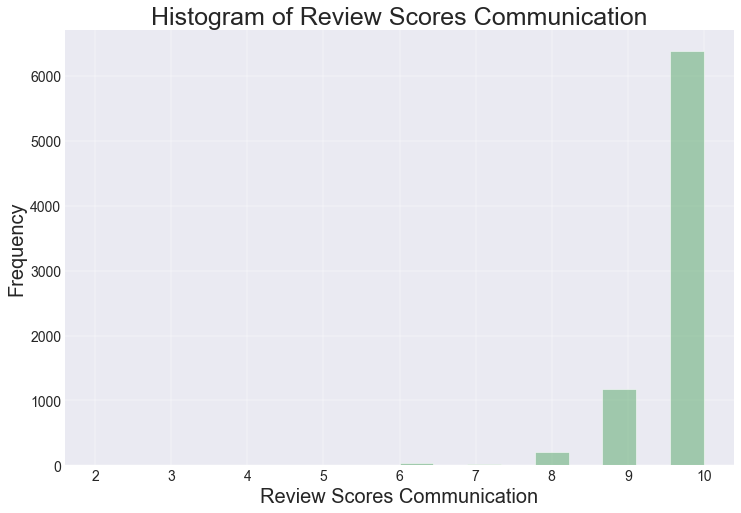

Avg Review Scores Location: 9.29
The null values will be replaced with the value of the Avg Review Scores Location.


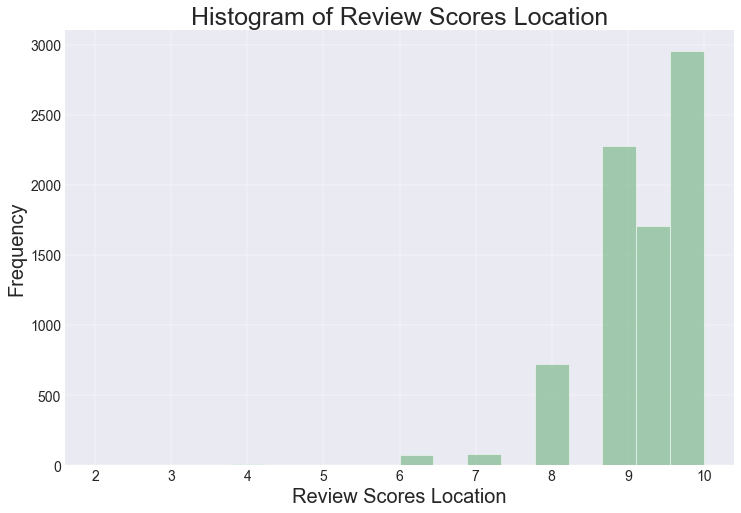

Avg Review Scores Value: 9.04
The null values will be replaced with the value of the Avg Review Scores Value.


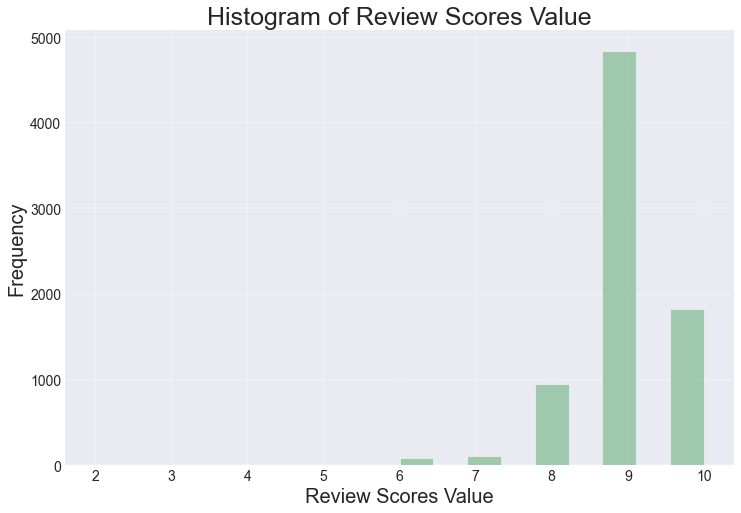

In [22]:
for i in range(len(RSList)):
    mean = round(np.mean(airbnb[RSList[i]]),2)
    print(f"Avg {xlabels[i]}: {mean}")
    print(f"The null values will be replaced with the value of the Avg {xlabels[i]}.")
    
    plt.figure(figsize=(12, 8))
    plt.hist(airbnb[RSList[i]], color='g', alpha=0.5, bins=18)
    plt.xlabel(xlabels[i], fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.title(f"Histogram of {xlabels[i]}", fontsize=25)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.grid(linewidth=2, alpha=0.2)
    plt.style.use('seaborn-darkgrid')

    plt.show()

**Host Response Time**

Number of Null Values for Host Reponse Time: 732


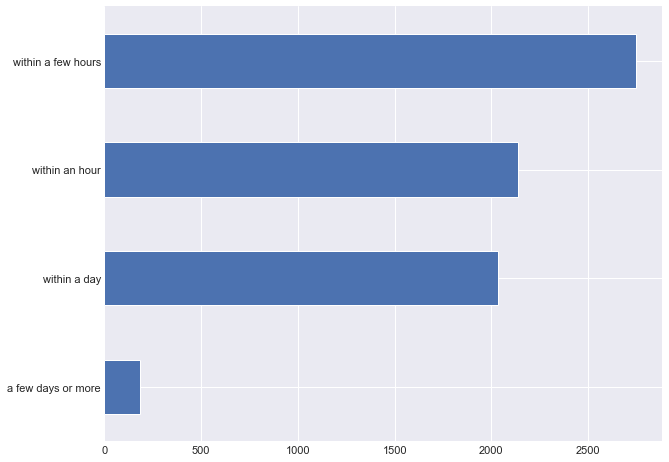

In [23]:
missingHRT = airbnb["host_response_time"].isnull().sum()
print(f"Number of Null Values for Host Reponse Time: {missingHRT}")

airbnb['host_response_time'].value_counts(ascending=True).plot(kind='barh', figsize=(10,8));

In [24]:
airbnb.isnull().sum()

host_id                          0
host_name                        0
host_since_year                  0
host_since_anniversary           0
id                               0
neighbourhood_cleansed           0
city                             0
state                            8
zipcode                        173
country                          0
latitude                         0
longitude                        0
property_type                    0
room_type                        0
accommodates                     0
bathrooms                        0
bedrooms                         0
beds                             0
bed_type                         0
price                            0
guests_included                  0
extra_people                     0
minimum_nights                   0
host_response_time             732
host_response_rate               0
number_of_reviews                0
review_scores_rating             0
review_scores_accuracy           0
review_scores_cleanl

### Calculate host acount age
> - Combine the "host_since" column with the "host_since_anniversary" column to get a full date <br>
> - Calculate time passed since that day to today

In [25]:
airbnb["year"] = airbnb["host_since_year"]
airbnb[["month", "day"]] = airbnb["host_since_anniversary"].str.split("/", expand = True)
hostsincedate = airbnb[['year','month', 'day']]
new_col = pd.to_datetime(hostsincedate)

airbnb.insert(loc=4, column='host_since_date', value=new_col)
airbnb.head()

,host_id,host_name,host_since_year,host_since_anniversary,host_since_date,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,year,month,day
0,1662,Chloe,2008,8/11,2008-08-11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0,2008,8,11
1,3159,Daniel,2008,9/24,2008-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0,2008,9,24
2,3718,Britta,2008,10/19,2008-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,2008,10,19
3,4716,Stefan,2008,11/30,2008-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2008,11,30
4,5271,Tyler,2008,12/17,2008-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0,2008,12,17


### Remove duplicate data


**Remove the columns that have duplicated information which are redundant.**

In [26]:
airbnb = airbnb.drop(columns=['host_since_year', 'host_since_anniversary', 'year', 'month', 'day'])
airbnb.head()

,host_id,host_name,host_since_date,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Calculate the host account age which is evaluating the time passed since that day when the host started this listing until today**

In [27]:
from datetime import date

today = pd.to_datetime(date.today())
time_passed = (today - airbnb["host_since_date"]).dt.days

airbnb.insert(loc=3, column='time_passed_days', value=time_passed)
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Remove listings without any reviews, and duplicate rows where the bot may have re-recorded listing data**

In [28]:
airbnb.duplicated(subset=['id']).sum()

20

In [29]:
airbnb[airbnb.duplicated(subset=['id'])].sort_values(by="id")

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
181,127233,Ingeborg,2010-05-18,4141,29554,Centrum-West,Amsterdam,NH,1013,Netherlands,52.380510,4.894189,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,130,1,0,4,within a day,0.90,63,96.00,10.00,9.00,10.00,10.0,10.00,9.00
229,298957,Kate,2010-11-25,3950,61680,Centrum-West,Jordaan,North Holland,1015,Netherlands,52.380553,4.887058,Apartment,Entire home/apt,2,2.0,1.0,1.0,Real Bed,100,2,20,5,within a few hours,1.00,45,97.00,10.00,10.00,10.00,10.0,10.00,9.00
452,666321,Daniel,2011-06-05,3758,136029,De Baarsjes - Oud-West,Amsterdam,North Holland,1057,Netherlands,52.367050,4.853809,Apartment,Entire home/apt,3,1.0,2.0,1.0,Real Bed,95,1,0,2,within an hour,1.00,26,97.00,10.00,10.00,10.00,10.0,8.00,9.00
1566,2243649,Martin & Smadar,2012-04-28,3430,451719,Centrum-West,Amsterdam,North Holland,1016,Netherlands,52.371155,4.878960,Apartment,Entire home/apt,4,2.0,1.0,3.0,Real Bed,150,2,35,3,within an hour,1.00,12,93.00,9.00,10.00,10.00,10.0,9.00,9.00
22,14589,Rutger,2009-04-23,4531,738245,Centrum-West,Amsterdam,North Holland,1015,Netherlands,52.379354,4.883276,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,90,1,0,3,NaN,0.91,8,93.00,10.00,9.00,9.00,9.0,10.00,9.00
179,125667,MichÃ¨le,2010-05-16,4143,1018703,Zuid,Amsterdam,North Holland,1072 AW,Netherlands,52.350450,4.886113,Boat,Entire home/apt,2,1.0,0.0,1.0,Real Bed,100,2,45,3,within an hour,1.00,46,92.00,9.00,9.00,9.00,9.0,9.00,9.00
78,62341,Jurgen,2009-12-11,4299,1030014,Centrum-West,Amsterdam,North Holland,1015 GN,Netherlands,52.381899,4.882599,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,69,1,0,3,within an hour,1.00,13,90.00,9.00,8.00,10.00,10.0,10.00,9.00
180,126790,Christopher,2010-05-17,4142,1088859,De Baarsjes - Oud-West,Amsterdam,North Holland,1054,Netherlands,52.367938,4.876497,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,0,2,within an hour,1.00,18,99.00,10.00,9.00,10.00,10.0,10.00,9.00
4319,7210540,Bram,2013-07-01,3001,1328738,Westerpark,Amsterdam,North Holland,1052 BJ,Netherlands,52.381207,4.879032,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,150,1,0,1,within a day,0.70,5,90.00,10.00,8.00,10.00,10.0,10.00,8.00
348,440034,Renske,2011-03-13,3842,1702822,Westerpark,Amsterdam,North Holland,1051 GT,Netherlands,52.383404,4.872991,Apartment,Entire home/apt,5,1.0,3.0,4.0,Real Bed,190,1,0,4,within a day,0.67,0,93.34,9.45,9.29,9.64,9.7,9.29,9.04


**Remove the duplicated rows where the bot may have re-recorded listing data**

In [30]:
airbnb.drop_duplicates(inplace=True)
airbnb.shape

(7813, 33)

**Remove the listings without any review**

In [31]:
noreviews = airbnb[airbnb['number_of_reviews'] == 0]['number_of_reviews']
print(f"Number of zero reviews: {noreviews.count()}")

noreviews_index = list(noreviews.index)
airbnb = airbnb.drop(noreviews_index).reset_index(drop=True)
airbnb.shape

Number of zero reviews: 1621


(6192, 33)

### Standardise entry of "State" and "City" columns
E.g. North Holland *vs* Noord-Holland

**Find out the distinct states under the "state" column**

In [32]:
airbnb["state"].unique()

array(['North Holland', 'Noord-Holland', 'NH', 'Amsterdam',
       'Noord holland', 'Jordaan', 'Noordholland', 'Noord Holland', nan,
       'Jordaan Amsterdam', 'Holland', 'Nieuwe Hoogstraat',
       'Jordaan/center', 'GN', 'Nl', 'Olanda Settentrionale', 'NC', 'Bx'],
      dtype=object)

**Replace some of the distinct states' name to North Holland**

In [33]:
north_holland = ["Noord holland", "NH", "Holland", "Noord-Holland", 
                 "Noordholland", "Noord Holland", "Nieuwe Hoogstraat", 
                 "Olanda Settentrionale", "Nl", "NC", "GN", "Bx", np.nan]

# airbnb[airbnb["state"].isin(north_holland)]

airbnb["state"] = airbnb["state"].replace(north_holland, "North Holland")
airbnb["state"].unique()

array(['North Holland', 'Amsterdam', 'Jordaan', 'Jordaan Amsterdam',
       'Jordaan/center'], dtype=object)

**Replace some of the distinct states' name to Jordaan**

In [34]:
jordaan = ["Jordaan Amsterdam", "Jordaan/center"]

# airbnb[airbnb["state"].isin(jordaan)]

airbnb["state"] = airbnb["state"].replace(jordaan, "Jordaan")
airbnb["state"].unique()

array(['North Holland', 'Amsterdam', 'Jordaan'], dtype=object)

In [35]:
# airbnb[airbnb["state"].isin(['Amsterdam', nan, 'GN', 'Nl', 'NC','Bx'])]

**Find out the distinct cities under the "city" column**<br>
Since Amsterdam is the only city investigated in Netherlands, I have replaced all of the distinct cities' name to Amsterdam.

In [36]:
airbnb["city"].unique()

array(['Amsterdam', 'De Pijp', 'Jordaan', 'Bos en Lommer',
       'Amsterdam-Zuidoost', 'Watergraafsmeer', 'Zeeburg', 'Amsterddam',
       'Osdorp', 'Slotervaart', 'Diemen', 'Landsmeer',
       'Amsterdam Zuidoost', 'Duivendrecht', 'North Holland',
       'EC Amsterdam', 'Amsterdam, De Baarsjes', 'Amsterdam ',
       'Amsterdam > Oud West', 'Badhoevedorp', 'Amsterdam- Zuidoost',
       'Ã\x81msterdam', 'Halfweg', 'amsterdam', 'Jordaan, Amsterdam',
       'Amstelveen', 'Nederland',
       'Amsterdam, Rivierenbuurt, Scheldebuurt',
       'Ð\x90Ð¼Ñ\x81Ñ‚ÐµÑ€Ð´Ð°Ð¼', 'Amsterdam Netherlands',
       'Amsterdam Zuid-Oost'], dtype=object)

In [37]:
cityList = list(airbnb["city"].unique())
airbnb["city"] = airbnb["city"].replace(cityList, "Amsterdam")
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,North Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,North Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Use `describe` to get the description of datasets.**

In [38]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,6192.0,8.997004e+06,7.192805e+06,1662.000000,3.307757e+06,6.999042e+06,1.367387e+07,3.026041e+07
time_passed_days,6192.0,3.060634e+03,4.024560e+02,2364.000000,2.729000e+03,3.013000e+03,3.317000e+03,4.786000e+03
id,6192.0,2.549792e+06,1.575209e+06,2818.000000,1.106597e+06,2.470174e+06,3.896330e+06,5.829776e+06
latitude,6192.0,5.236658e+01,1.392260e-02,52.291569,5.235705e+01,5.236652e+01,5.237580e+01,5.242538e+01
longitude,6192.0,4.887721e+00,2.925864e-02,4.763264,4.869296e+00,4.886321e+00,4.902445e+00,5.013616e+00
accommodates,6192.0,3.115149e+00,1.745238e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,6192.0,1.141957e+00,4.373566e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
bedrooms,6192.0,1.399225e+00,8.719610e-01,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
beds,6192.0,1.978359e+00,1.648830e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,1.600000e+01
price,6192.0,1.237455e+02,7.489426e+01,15.000000,8.000000e+01,1.000000e+02,1.450000e+02,1.495000e+03


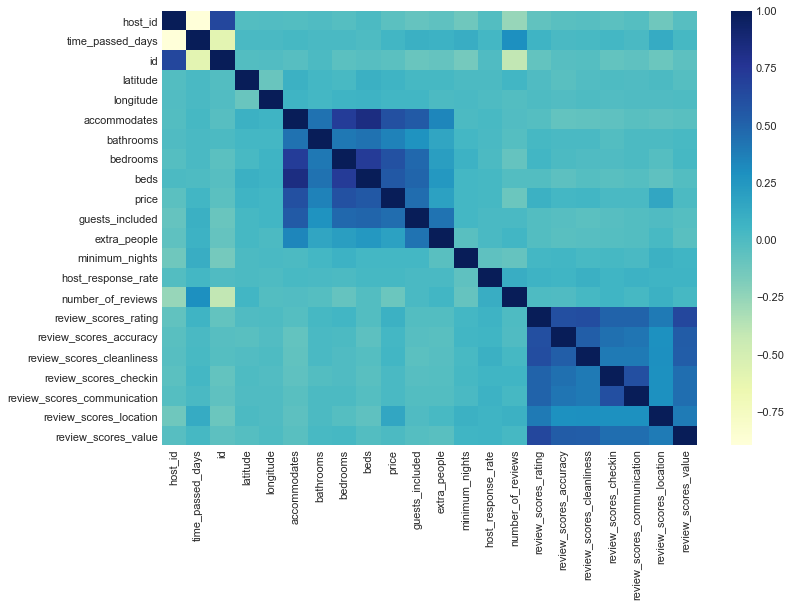

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(airbnb.corr(), cmap="YlGnBu");

## Business Problem 1: Invest or Not to Invest?
> **Prompt 1: How much revenue do successful hosts generate?**
- Need to investigate "host" data
- Need to define "successful" host by investigating "reviews" data
- Need to calculate revenue by investigating "prices" data 

**Step 1: Calculate a proxy number of stays for each listing by assumming that 50% of the customers who stayed left a review.**

In [40]:
NumOfStays = airbnb["number_of_reviews"] * 2

airbnb.insert(loc=25, column='number_of_stays', value=NumOfStays)

In [41]:
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_stays,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,22,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,216,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,North Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,30,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,40,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,North Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,2,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Step 2: Calculate estimated daily revenue for two guests, unless the accommodation explicitly accepts only one.**

#### Definition of Interested Columns
I have defined **Price, Guest_Included, Extra_People, Accommodates** as:
- **Price:** Price for one-night stay
- **Guest_Included:** This is how many guests are included in the Price
- **Extra_People:** How much extra per person, if you go above the number of "Guest_Included"
- **Accommodates:** How many people the property can accommodate

In [42]:
def estimated_daily_revenue(accommodates, guests_included, extra_people, price):
    
    estimated_DR = 0
    
    if guests_included > 1:
        estimated_DR = (price/guests_included)  * 2
    elif (guests_included == 1) & (accommodates == 1):
        estimated_DR = price
    elif (guests_included == 1) & (accommodates > 1):
        estimated_DR = price + extra_people
        
    return estimated_DR
        
        
# Testing if function works
estimated_daily_revenue(4, 4, 10, 130)

65.0

In [43]:
# Add a new column 'estimated_daily_revenue' and applying the above function
estimated_DRs = airbnb.apply(lambda x: estimated_daily_revenue(x['accommodates'], 
                                                               x['guests_included'], 
                                                               x['extra_people'], 
                                                               x['price']), axis=1)


airbnb.insert(loc = 23, column = 'estimated_daily_revenue', value = estimated_DRs)
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,estimated_daily_revenue,host_response_time,host_response_rate,number_of_stays,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,65.0,within a day,0.80,22,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,69.0,within an hour,1.00,216,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,North Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,95.0,within a few hours,1.00,30,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,110.0,within a day,1.00,40,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,North Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,250.0,within a day,0.89,2,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Step 3: Multiply the estimated daily revenue by minimum number of nights to get an estimated revenue per booking**

In [44]:
estimated_revenue_per_booking = airbnb["estimated_daily_revenue"] * airbnb["minimum_nights"]
airbnb.insert(loc = 24, column = 'estimated_revenue_per_booking', value = estimated_revenue_per_booking)
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,estimated_daily_revenue,estimated_revenue_per_booking,host_response_time,host_response_rate,number_of_stays,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,65.0,260.0,within a day,0.80,22,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,69.0,207.0,within an hour,1.00,216,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,North Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,95.0,285.0,within a few hours,1.00,30,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,110.0,220.0,within a day,1.00,40,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,North Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,250.0,500.0,within a day,0.89,2,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Step 4: Calculate an estimated total revenue for each listing by mulitplying the estimated revenue per booking you calculated by the estimated number of stays you calculated**

In [45]:
estimated_total_revenue = airbnb["estimated_revenue_per_booking"] * airbnb["number_of_stays"]
airbnb.insert(loc = 25, column = 'estimated_total_revenue', value = estimated_total_revenue)
airbnb.head()

,host_id,host_name,host_since_date,time_passed_days,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,estimated_daily_revenue,estimated_revenue_per_booking,estimated_total_revenue,host_response_time,host_response_rate,number_of_stays,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008-08-11,4786,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,65.0,260.0,5720.0,within a day,0.80,22,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008-09-24,4742,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,69.0,207.0,44712.0,within an hour,1.00,216,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008-10-19,4717,103026,De Baarsjes - Oud-West,Amsterdam,North Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,95.0,285.0,8550.0,within a few hours,1.00,30,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008-11-30,4675,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,110.0,220.0,8800.0,within a day,1.00,40,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008-12-17,4658,4728389,Centrum-West,Amsterdam,North Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,250.0,500.0,1000.0,within a day,0.89,2,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


**Build several Pivot Tables in order to quickly explore the data at a high-level** <br>
Pivot table should contain host name, total revenue, and number of listings (make sure to exclude listings with no bookings).

In [46]:
tableHost = pd.pivot_table(airbnb, 
                       values = ['estimated_total_revenue', 'host_id'], 
                       index = ['host_name'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_id': len}).sort_values(by='estimated_total_revenue', ascending=False)

tableHost = tableHost.rename(columns={'estimated_total_revenue':'total_revenue'}, level=0)
tableHost = tableHost.rename(columns={'host_id':'number_of_listings'}, level=0)

format_dictH = {'total_revenue':'${0:,.2f}', 'number_of_listings':'{:0}'}

tableHost10 = tableHost.head(10).style.format(format_dictH)
tableHost10

,total_revenue,number_of_listings
host_name,,
Daan,"$645,402.00",16
Peter,"$608,521.80",39
Douwe&Niki,"$457,354.00",65
Jan,"$366,613.00",23
Remco,"$365,320.00",17
Fred & Wietske,"$307,350.00",17
Annelies,"$285,032.00",19
Marcel,"$260,663.00",19
Stefan,"$244,267.20",13


Based on the generated pivot table, the host that has generated the greatest total revenue is Daan with 16 listings around Amsterdam. However, we need to find out the **definition of a successful host** by investigating the reviews data in order to better understand what makes a successful host and set a benchmark. Or do we define a successful host based on how much total revenue they were able to generate? I have decided to take the former.

**How do we define a successful host?**

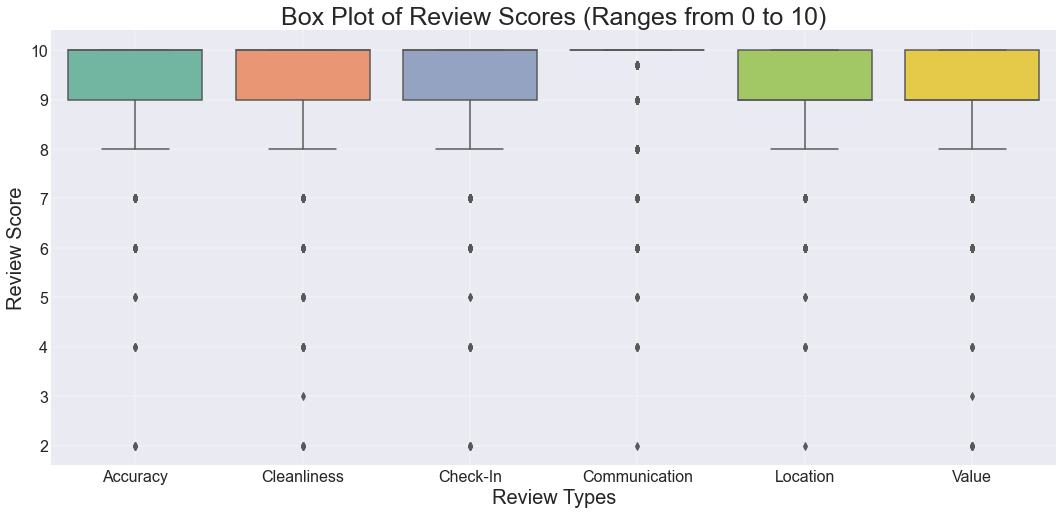

In [47]:
# review_scores_rating column was removed for clearer visualisation of the reviews data
reviews = airbnb[["review_scores_accuracy", 
          "review_scores_cleanliness", 
          "review_scores_checkin", 
          "review_scores_communication", 
          "review_scores_location", 
          "review_scores_value"]]

plt.figure(figsize=(18, 8))
sns.boxplot(data=reviews, orient="v", palette="Set2")

plt.xlabel("Review Types", fontsize=20)
plt.ylabel("Review Score", fontsize=20)
plt.title("Box Plot of Review Scores (Ranges from 0 to 10)", fontsize=25)

positions = (0, 1, 2, 3, 4, 5)
xticklabels=('Accuracy', 'Cleanliness', 'Check-In', 'Communication', 'Location', 'Value')

plt.xticks(positions, xticklabels, fontsize=16)
plt.yticks(fontsize=16)

plt.grid(linewidth=2, alpha=0.2)

plt.show()

**Let's assume 75th percentile for review score rating & number of reviews is considered as "successful"**

In [48]:
reviewList = ["number_of_reviews", 
          "review_scores_rating", 
          "review_scores_accuracy", 
          "review_scores_cleanliness", 
          "review_scores_checkin", 
          "review_scores_communication", 
          "review_scores_location", 
          "review_scores_value"]

airbnb[['number_of_reviews', 'review_scores_rating']].quantile(0.75)

number_of_reviews       19.0
review_scores_rating    99.0
Name: 0.75, dtype: float64

**How many listings fit both conditions (at 75th percentile)?**

In [49]:
airbnb[(airbnb.number_of_reviews >= 19) 
                & (airbnb.review_scores_rating >= 99)][reviewList].count()

number_of_reviews              109
review_scores_rating           109
review_scores_accuracy         109
review_scores_cleanliness      109
review_scores_checkin          109
review_scores_communication    109
review_scores_location         109
review_scores_value            109
dtype: int64

**Let's assume 75th percentile for all review types is considered as "successful"**

In [50]:
airbnb[reviewList].quantile(0.75)

number_of_reviews              19.0
review_scores_rating           99.0
review_scores_accuracy         10.0
review_scores_cleanliness      10.0
review_scores_checkin          10.0
review_scores_communication    10.0
review_scores_location         10.0
review_scores_value            10.0
Name: 0.75, dtype: float64

**How many listings fit all conditions (at 75th percentile for all conditions)?**

In [51]:
airbnb[(airbnb.number_of_reviews >= 19) 
                & (airbnb.review_scores_rating >= 99)
                & (airbnb.review_scores_accuracy >= 10)
                & (airbnb.review_scores_cleanliness >= 10)
                & (airbnb.review_scores_checkin >= 10)
                & (airbnb.review_scores_communication >= 10)
                & (airbnb.review_scores_location >= 10)
                & (airbnb.review_scores_value >= 10)][reviewList].count()

number_of_reviews              61
review_scores_rating           61
review_scores_accuracy         61
review_scores_cleanliness      61
review_scores_checkin          61
review_scores_communication    61
review_scores_location         61
review_scores_value            61
dtype: int64

In [52]:
host75Q = (61 / len(airbnb)) * 100
print(f"Based on the intial assumption, only {round(host75Q, 2)}% of the total listings are considered successful.")

Based on the intial assumption, only 0.99% of the total listings are considered successful.


It seems that only a very small portion of the total listings in Amsterdam are successful. Let's check **how many hosts are there** based on the initial assumption given that the 75th percentile for all review types is considered as "successful".

In [53]:
host = airbnb[(airbnb.number_of_reviews >= 19) 
                & (airbnb.review_scores_rating >= 99)
                & (airbnb.review_scores_accuracy >= 10)
                & (airbnb.review_scores_cleanliness >= 10)
                & (airbnb.review_scores_checkin >= 10)
                & (airbnb.review_scores_communication >= 10)
                & (airbnb.review_scores_location >= 10)
                & (airbnb.review_scores_value >= 10)]["host_name"].nunique()

total_hosts = airbnb['host_id'].nunique()
hostP = (host / total_hosts) * 100

print(f"Based on the intial assumption, {round(hostP, 2)}% of all hosts in Amsterdam are considered successful.")

Based on the intial assumption, 1.13% of all hosts in Amsterdam are considered successful.


In [54]:
hostSuccess = airbnb[(airbnb.number_of_reviews >= 19) 
                & (airbnb.review_scores_rating >= 99)
                & (airbnb.review_scores_accuracy >= 10)
                & (airbnb.review_scores_cleanliness >= 10)
                & (airbnb.review_scores_checkin >= 10)
                & (airbnb.review_scores_communication >= 10)
                & (airbnb.review_scores_location >= 10)
                & (airbnb.review_scores_value >= 10)]

hostSuccessPT = pd.pivot_table(hostSuccess, 
                       values = ['estimated_total_revenue', 'host_id'], 
                       index = ['host_name'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_id': len}).sort_values(by='estimated_total_revenue', ascending=False)

hostSuccessPT = hostSuccessPT.rename(columns={'estimated_total_revenue':'total_revenue'}, level=0)
hostSuccessPT = hostSuccessPT.rename(columns={'host_id':'number_of_listings'}, level=0)

format_dictH = {'total_revenue':'${0:,.2f}', 'number_of_listings':'{:0}'}

hostSuccessPT10 = hostSuccessPT.head(10).style.format(format_dictH)
hostSuccessPT10

,total_revenue,number_of_listings
host_name,,
Ester,"$129,156.00",1
Julian,"$101,460.00",1
Lisa En Peter Paul,"$93,480.00",1
Rogier,"$88,200.00",1
Hanneke & Arjen,"$85,050.00",1
Marie-Katrien,"$84,000.00",1
Fred & Wietske,"$83,160.00",1
Take & Eline,"$81,120.00",1
Johan,"$70,080.00",1


From the newly generated pivot table by taking account of the definition of a successful host, the host that has generated the greatest total revenue is Ester. This is assuming that the defintion of a successful host is based on the 75 percentile for all review types. Personally, I think this is a sensible assumption to make given that each host can have multiple listings which will definitely affect the total revenue generated by the host. Therefore, defining a successful host based on all of the review types will be a suitable choice to make in order to fairly evaluate how much revenue successful hosts can generate.

In [55]:
avg_revenue = round(np.mean(hostSuccessPT.total_revenue), 2)
print(f"Therefore, the average revenue generated by successful hosts in Amsterdam is ${avg_revenue:,}.")

Therefore, the average revenue generated by successful hosts in Amsterdam is $36,408.29.


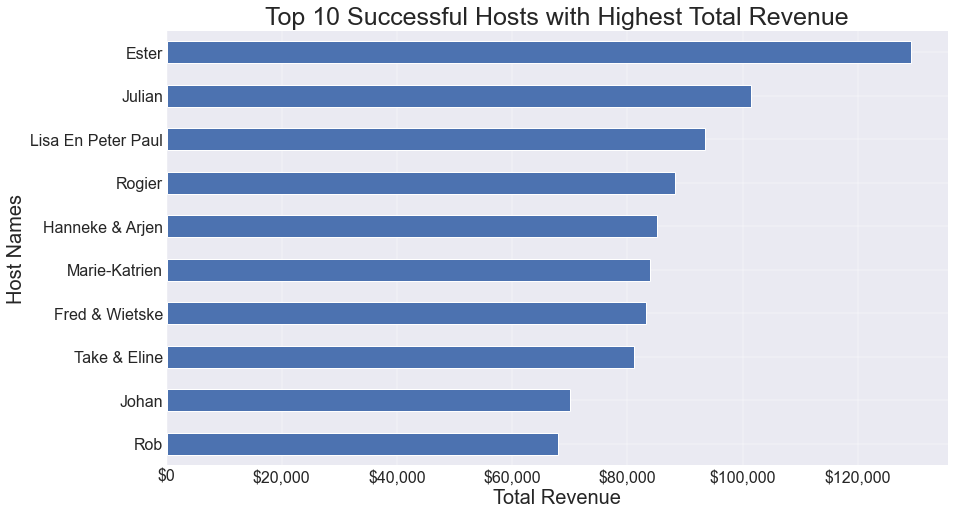

In [56]:
hostSuccessPT = pd.pivot_table(hostSuccess, 
                       values = ['estimated_total_revenue', 'host_id'], 
                       index = ['host_name'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_id': len}).sort_values(by='estimated_total_revenue', ascending=False)

hostSuccessPT10 = hostSuccessPT.head(10).sort_values(by='estimated_total_revenue', ascending=True)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

hostSuccessPT10['estimated_total_revenue'].plot(kind='barh');

plt.xlabel("Total Revenue", fontsize=20)
plt.ylabel("Host Names", fontsize=20)
plt.title("Top 10 Successful Hosts with Highest Total Revenue", fontsize=25)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Formatting the tick values with '$' and ',' for total revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.grid(linewidth=2, alpha=0.2)

plt.show()


> **Prompt 2: Which property types receive the most positive reviews?**<br>
Need to define what is considered a positive review. Is it only considered a postive review when the review scores rating of a given property is above the average value across all property types in this case? 

In [57]:
propertyRatingsAvg = airbnb['review_scores_rating'].mean()

airbnbPR = airbnb[airbnb['review_scores_rating'] > propertyRatingsAvg]

table = pd.pivot_table(airbnbPR, 
                       values = ['estimated_total_revenue', 'host_id', 'review_scores_rating'], 
                       index = ['property_type'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_id': len, 
                                'review_scores_rating':np.mean}).sort_values(by='host_id', 
                                                                             ascending=False)

table = table.rename(columns={'estimated_total_revenue':'Total Revenue'}, level=0)
table = table.rename(columns={'host_id':'No. of Positive Reviews'}, level=0)
table = table.rename(columns={'review_scores_rating':'Avg Rating'}, level=0)

format_dictH = {'Total Revenue':'${0:,.2f}', 
                'No. of Positive Reviews':'{:0}', 
                'Avg Rating': '{0:,.2f}'}

table = table.style.format(format_dictH)
table

,Total Revenue,No. of Positive Reviews,Avg Rating
property_type,,,
Apartment,"$25,980,120.85",2991,97.74
House,"$2,632,609.29",314,97.89
Boat,"$2,352,940.33",171,97.74
Bed & Breakfast,"$1,858,806.00",148,97.32
Loft,"$356,358.00",31,97.84
Other,"$47,300.00",6,98.00
Camper/RV,"$1,316.00",3,98.67
Villa,"$20,552.00",3,96.33
Cabin,$760.00,1,100.00


Based on the pivot table above, Apartment receives the most positive reviews, if we are assuming that the definition of a positive review is when the review of a property is greater than the average review score rating across all types of property. However, we have to take note that majority of the listings are apartments, hence, it is most likely that the property type with the most number of positive reviews will be apartments. 

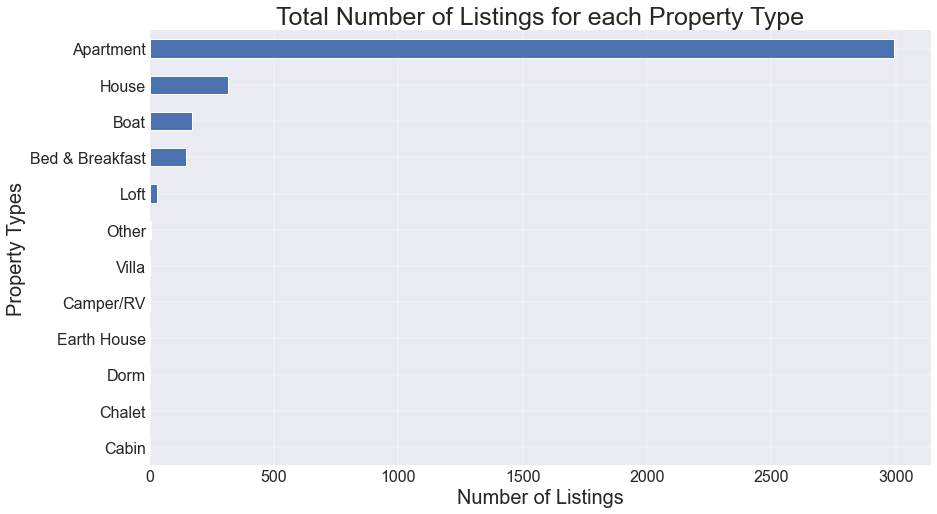

In [58]:
table = pd.pivot_table(airbnbPR, 
                       values = ['estimated_total_revenue', 'host_id', 'review_scores_rating'], 
                       index = ['property_type'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_id': len, 
                                'review_scores_rating':np.mean}).sort_values(by='host_id', 
                                                                             ascending=True)



fig, ax = plt.subplots(1, 1, figsize=(14, 8))

table['host_id'].plot(kind='barh');

plt.xlabel("Number of Listings", fontsize=20)
plt.ylabel("Property Types", fontsize=20)
plt.title("Total Number of Listings for each Property Type", fontsize=25)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.grid(linewidth=2, alpha=0.2)

plt.show()

## Business Problem 2: Which neighbourhood should be invested?
> **Prompt 3: Which neighbourhoods host the most listings?**

In [59]:
tableNB = pd.pivot_table(airbnb, 
                       values = ['estimated_total_revenue', 'host_name'], 
                       index = ['neighbourhood_cleansed'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_name': len}).sort_values(by='host_name', ascending=False)

tableNB = tableNB.rename(columns={'estimated_total_revenue':'Total Revenue'}, level=0)
tableNB = tableNB.rename(columns={'host_name':'No. of Listings'}, level=0)


format_dictH = {'Total Revenue':'${0:,.2f}', 
                'No. of Listings':'{:0}'}

tableNB = tableNB.head().style.format(format_dictH)
tableNB

,Total Revenue,No. of Listings
neighbourhood_cleansed,,
Centrum-West,"$15,502,429.07",1143
De Baarsjes - Oud-West,"$8,103,753.26",989
De Pijp - Rivierenbuurt,"$5,216,632.93",751
Centrum-Oost,"$8,374,670.84",746
Westerpark,"$3,670,548.00",550


Based on the pivot table above, Centrum-West hosts the most listings in Amsterdam. 

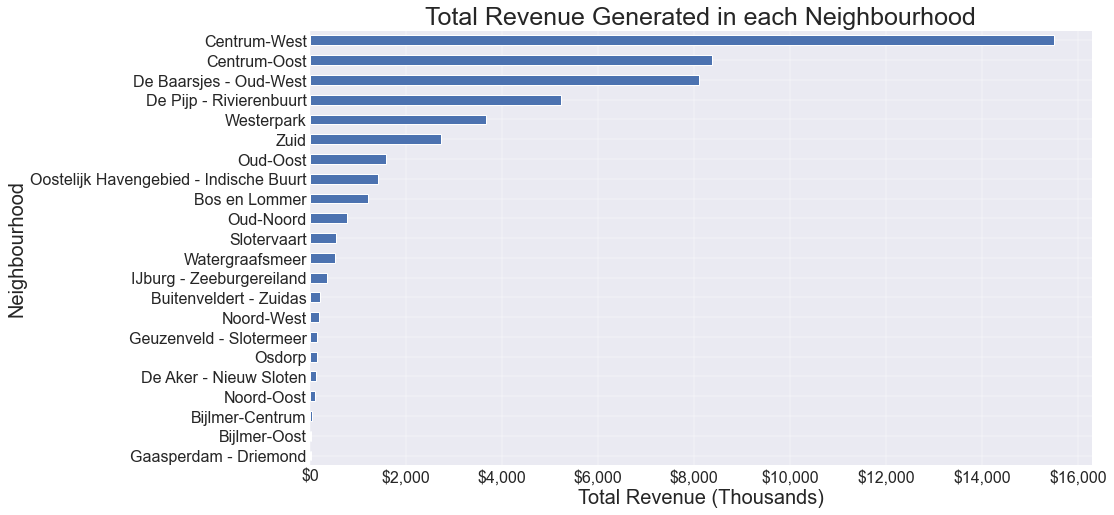

In [60]:
tableNB = pd.pivot_table(airbnb, 
                       values = ['estimated_total_revenue', 'host_name'], 
                       index = ['neighbourhood_cleansed'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_name': len}).sort_values(by='estimated_total_revenue', ascending=True)


tableNB['estimated_total_revenue'] = tableNB['estimated_total_revenue'] / 1000

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

tableNB['estimated_total_revenue'].plot(kind='barh')

plt.xlabel("Total Revenue (Thousands)", fontsize=20)
plt.ylabel("Neighbourhood", fontsize=20)
plt.title("Total Revenue Generated in each Neighbourhood", fontsize=25)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Formatting the tick values with '$' and ',' for total revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.grid(linewidth=2, alpha=0.2)

plt.show()

To get a granular perspective of the revenue generated in each neighbourhood, I have decided to form a pivot table that illustrates the amount of daily and total revenue generated by all of the listings for each property type in each neighbourhood. 

In [61]:
airbnbNB = airbnb[['host_name', 
                   'neighbourhood_cleansed', 
                   'property_type',
                   'estimated_daily_revenue', 
                   'estimated_total_revenue']]

airbnbNB = airbnbNB.rename(columns={'neighbourhood_cleansed':'neighbourhood'}, level=0)


tableNB = pd.pivot_table(airbnbNB, 
                       values = ['estimated_total_revenue', 'host_name', 'estimated_daily_revenue'], 
                       index = ['neighbourhood', 'property_type'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_name': len, 
                                'estimated_daily_revenue': np.sum}).sort_values(by='neighbourhood')

tableNB = tableNB.rename(columns={'estimated_daily_revenue':'Daily Revenue'}, level=0)
tableNB = tableNB.rename(columns={'estimated_total_revenue':'Total Revenue'}, level=0)
tableNB = tableNB.rename(columns={'host_name':'No. of Listings'}, level=0)


format_dictH = {'Daily Revenue':'${0:,.2f}', 
                'Total Revenue':'${0:,.2f}', 
                'No. of Listings':'{:0}'}

tableNB = tableNB.style.format(format_dictH)
tableNB

From the generated pivot above, it shows that Centrum-West is indeed the neighbourhood with the greatest total revenue generated especially for listings that are apartments.

> **Prompt 4: Which neighbourhoods receive the most positive reviews?**

In [62]:
tableNB = pd.pivot_table(airbnbPR, 
                       values = ['estimated_total_revenue', 'host_name', 'review_scores_rating'], 
                       index = ['neighbourhood_cleansed'], 
                       aggfunc={'estimated_total_revenue': np.sum, 
                                'host_name': len, 
                                'review_scores_rating':np.mean}).sort_values(by='host_name', 
                                                                             ascending=False)

tableNB = tableNB.rename(columns={'estimated_total_revenue':'Total Revenue'}, level=0)
tableNB = tableNB.rename(columns={'host_name':'No. of Positive Reviews'}, level=0)
tableNB = tableNB.rename(columns={'review_scores_rating':'Avg Rating'}, level=0)

format_dictH = {'Total Revenue':'${0:,.2f}', 
                'No. of Positive Reviews':'{:0}', 
                'Avg Rating': '{0:,.2f}'}

tableNB = tableNB.head().style.format(format_dictH)
tableNB

,Total Revenue,No. of Positive Reviews,Avg Rating
neighbourhood_cleansed,,,
Centrum-West,"$10,736,894.40",683,97.49
De Baarsjes - Oud-West,"$5,357,881.65",598,97.81
Centrum-Oost,"$5,672,970.00",474,97.68
De Pijp - Rivierenbuurt,"$3,249,503.33",444,97.82
Westerpark,"$2,198,820.33",316,97.76


Based on the pivot table above, Centrum-West receives the most positive reviews in Amsterdam. 

# Data Summary & Presentation

### Data Visualisation
Visualising insightful data for easier comprehension in support of your argument.
**Note:** Your client is unwilling to go into untested markets - consider limiting the data you visualise to only the top 10 best performers (i.e. successful hosts).

### Summarise relevant statistics for various data points (max, median, mode)
- Identify listing/host that generates the most revenue<br>
> Find out the % rating with entire 2-bedroom apartment under $200/night.<br>
- Provide a profile of Airbnb activity in Amsterdam
- Identify top-performing hosts and listings
- Generate list of prospect hosts to target

**Strong plausible correlation between Total Revenue generated and number of reviews received.**

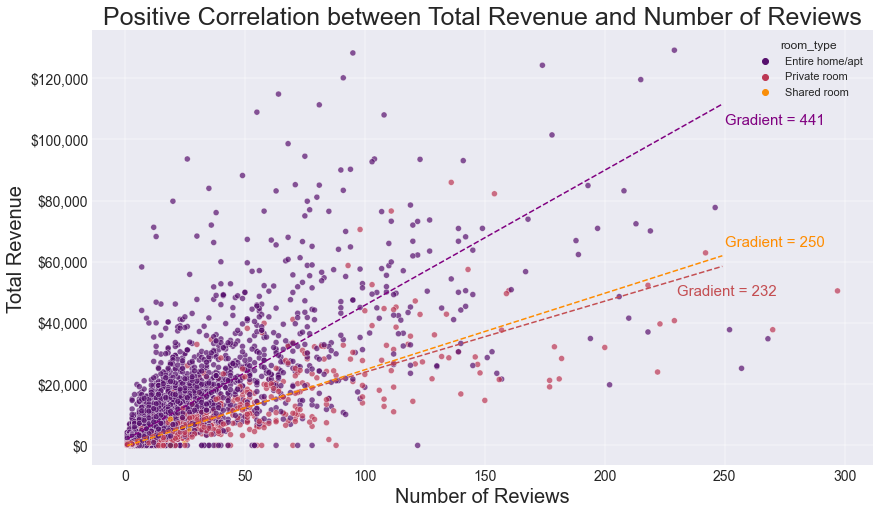

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

x = np.arange(start=1, stop=250, step=1)


home = airbnb[airbnb['room_type'] == 'Entire home/apt']
private = airbnb[airbnb['room_type'] == 'Private room']
shared = airbnb[airbnb['room_type'] == 'Shared room']


outliers = list(airbnb[airbnb.estimated_total_revenue > 150000].index)

sns.scatterplot(x='number_of_reviews', y='estimated_total_revenue', 
                data=airbnb.drop(outliers, axis=0), hue = 'room_type', 
                palette = 'inferno', alpha=0.7)

mH, bH = np.polyfit(home['number_of_reviews'], home['estimated_total_revenue'], 1)
mP, bP = np.polyfit(private['number_of_reviews'], private['estimated_total_revenue'], 1)
mS, bS = np.polyfit(shared['number_of_reviews'], shared['estimated_total_revenue'], 1)

plt.plot(x, mH*x + bH, color='purple', linestyle='--')
plt.plot(x, mP*x + bP, color='r', linestyle='--')
plt.plot(x, mS*x + bS, color='darkorange', linestyle='--')

plt.title('Positive Correlation between Total Revenue and Number of Reviews', fontsize=25)
plt.xlabel("Number of Reviews", fontsize=20)
plt.ylabel("Total Revenue", fontsize=20)

plt.text(250, 105000, f"Gradient = {round(mH)}", fontsize=15, color='purple')
plt.text(230, 49000, f"Gradient = {round(mP)}", fontsize=15, color='r')
plt.text(250, 65000, f"Gradient = {round(mS)}", fontsize=15, color='darkorange')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Formatting the tick values with '$' and ',' for total revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.grid(linewidth=2, alpha=0.25)
plt.style.use('seaborn-darkgrid')

plt.show()

Based on the scatter plot above, there seems to be a **correlation between Number of Reviews and Total Revenue generated per host**. It is also clear that 'Entire Home / Apartment' type of rooms are usually obtaining larger total revenue compared to other room types with the same number of reviews. This is because the gradient of the best-fit lines has illustrated that insight, given that, the gradient/slope of the best-fit line for 'Entire Home / Apartment' is larger than that for both 'Private' and 'Shared' rooms. 

Another scatter plot is constructed to see an overview of where most of the listings with high revenues and number of reviews are located in specific neighbourhoods.

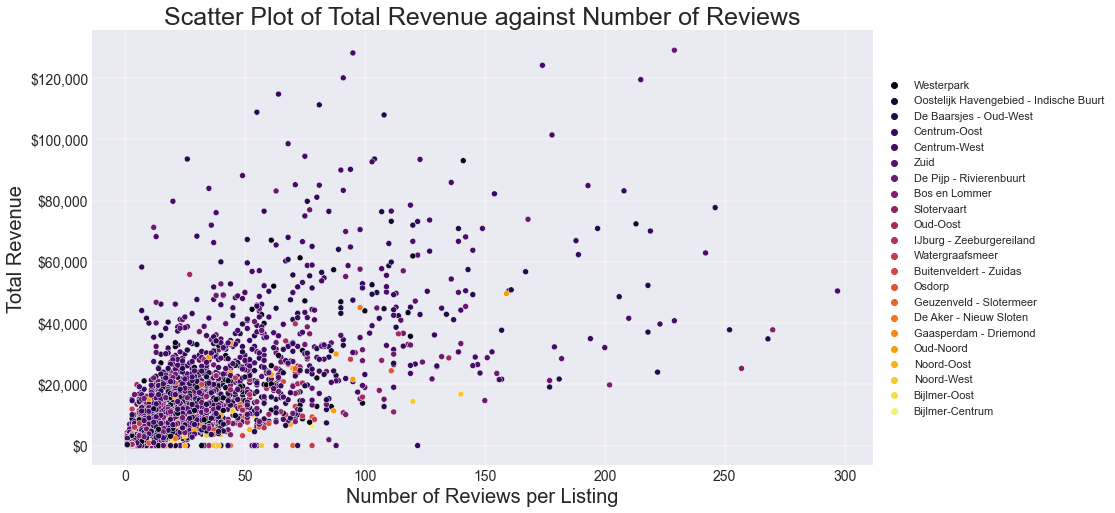

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

sns.scatterplot(x='number_of_reviews', y='estimated_total_revenue', 
                data=airbnb.drop(outliers, axis=0), 
                hue = 'neighbourhood_cleansed', 
                palette = 'inferno', alpha=1)


plt.title('Scatter Plot of Total Revenue against Number of Reviews', fontsize=25)
plt.xlabel("Number of Reviews per Listing", fontsize=20)
plt.ylabel("Total Revenue", fontsize=20)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Formatting the tick values with '$' and ',' for total revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Positioning the Legend Box
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.grid(linewidth=2, alpha=0.25)
plt.style.use('seaborn-darkgrid')

plt.show()

**Finding out the number of listings with entire 2-bedroom apartment under $200/night within each neighbourhood.**

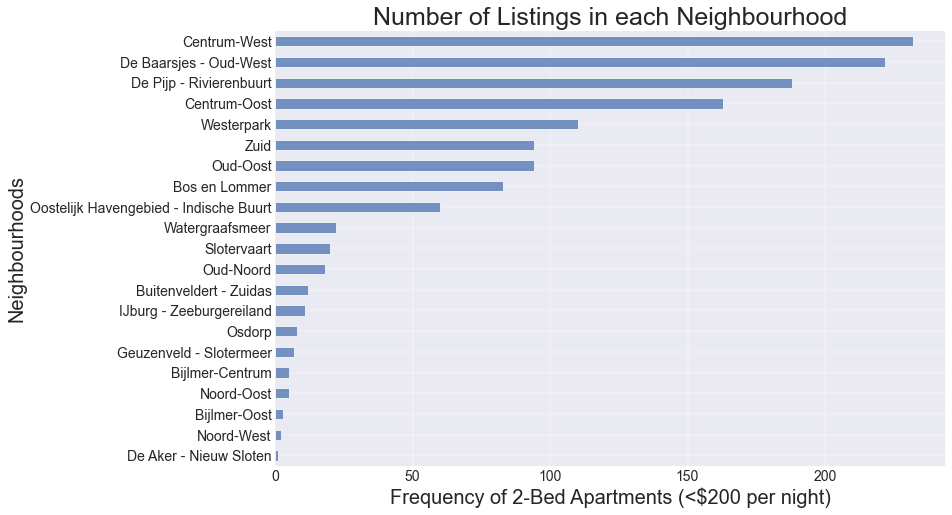

In [65]:
airbnb2BedApartment = airbnb[(airbnb.bed_type == 'Real Bed') 
                             & (airbnb.beds == 2) 
                             & (airbnb.property_type == "Apartment") 
                             & (airbnb.estimated_daily_revenue <= 200)]


plt.figure(figsize=(12, 8))
airbnb2BedApartment.neighbourhood_cleansed.value_counts(ascending=True).plot(kind='barh', alpha=0.75, color='b');

plt.xlabel("Frequency of 2-Bed Apartments (<$200 per night)", fontsize=20)
plt.ylabel("Neighbourhoods", fontsize=20)
plt.title("Number of Listings in each Neighbourhood", fontsize=25)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.grid(linewidth=2, alpha=0.2)
plt.style.use('seaborn-darkgrid')

plt.show()

It is clear that Centrum-West again has the most number of 2-Bed Apartments under $200 per night although there are other neighbourhoods such as De Baarsjes - Oud-West and DePijp - Rivierenbuurt that are considered close competitors. 

**To create a more intuitive visualisation of the insights gathered, I have used folium to create a map of Amsterdam to illustrate the number of listings within each neighbourhood along with the daily and total revenue generated.**

In [66]:
def generateBaseMap(default_location=[52.3680, 4.9036], 
                    default_zoom_start=12, tiles='OpenStreetMap'):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location, 
        zoom_start = default_zoom_start, 
        control_scale = True, 
        tiles = tiles
    )
    
    return base_map

In [67]:
base_map = generateBaseMap(default_location=[52.3680, 4.9036], tiles='Stamen Terrain')

latsList = airbnb.latitude.tolist()
lonsList = airbnb.longitude.tolist()
locations = list(zip(latsList, lonsList))

FastMarkerCluster(data = locations).add_to(base_map)
base_map

In [68]:
neighbourhoods = gpd.read_file("neighbourhoods.geojson")

airbnbNB = airbnbNB[['neighbourhood', 'estimated_daily_revenue', 'estimated_total_revenue']].set_index('neighbourhood')
airbnbNB = airbnbNB.groupby('neighbourhood').sum()

neighbourhoods = pd.merge(neighbourhoods, airbnbNB, on='neighbourhood', how='left')
neighbourhoods = neighbourhoods.round()

In [69]:
base_map = generateBaseMap(default_location=[52.3680, 4.9036], tiles='OpenStreetMap')

map_dict = neighbourhoods.set_index('neighbourhood')['estimated_total_revenue'].to_dict()
color_scale = LinearColormap(['yellow','red'], 
                             vmin = min(map_dict.values()), 
                             vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)


folium.GeoJson(data = neighbourhoods,
               name = 'Amsterdam',
               tooltip = folium.features.GeoJsonTooltip(fields=['neighbourhood', 
                                                                'estimated_daily_revenue', 
                                                                'estimated_total_revenue'], 
                                                        labels=True, sticky=False, localize=True), 
               style_function = lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.3
                   }, 
               highlight_function = lambda feature: {'weight':3, 'fillColor': get_color(feature), 
                                                     'fillOpacity': 0.8}).add_to(base_map)

base_map

All in all, it is clear that Centrum-West is the neighbourhood that the investors should be investing especially for listings that are apartments based on the given data available. However, we should take note that the living cost in the respective neighbourhoods were not considered as no such data was made available. Therefore, if such information was made available, it might actually alter the decision making results given that a higher total revenue generated usually would also incur greater costs due to consumer demand or popularity in that specific neighbourhood or area. 